# TAS - example notebook 

Authors: Tom Peytor and Nikola Šibalić

Last change: 9 May 2019.

The notebooks contains following examples of use for `tas` Python package (TAS - Transmission spectra with Atom-Surface interactions):

* [Installation](#Installation)
* [Generate transmission spectra prediction](#Generate-transmission-spectra-prediction)
* [Fit data using calculated spectra](#Fit-data-using-calculated-spectra)

This code is used in manuscript [T. Peyrot, N. Šibalić, Y.R.P. Sortais, A. Browaeys, A. Sargsyan, D. Sarkisyan, I.G. Hughes and C.S. Adams, "Measurement of the atom-surface van der Waals interaction by transmission spectroscopy in a wedged nano-cell", arXiv:1905.02783](https://arxiv.org/abs/1905.02783).

## Installation

Package can be installed by calling from command line

`pip install TAS-Transmission-Atom-Surface`

or, equivalently, executing the following line in the notebook

In [ ]:
!pip install TAS-Transmission-Atom-Surface

## Generate transmission spectra prediction

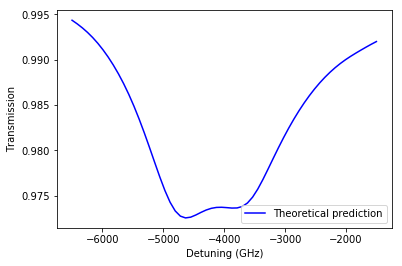

In [1]:
import sys, os
rootDir = '../' 
sys.path.insert(0,rootDir)
from tas import *
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import colors
import numpy as np
        
laserDetuning = np.linspace(-6500,-1500,60)  # (MHz)
temperature = 228  # (degree Celsius)
collisionalBroadening = 840  # (MHz)
C3 = 2  # (kHz mum^3)
cellLength = 80e-9  # (m)
collisionalShift = 0  # (MHz)

calc = ThinCellSpectra(nSurface=1.76)
T = calc.getTransmission(laserDetuning,
                           temperature,
                           collisionalBroadening,
                           collisionalShift,
                           C3,
                           cellLength)

plt.figure()
plt.plot(laserDetuning, T,
         'b', label='Theoretical prediction')
plt.xlabel('Detuning (GHz)')
plt.ylabel('Transmission' )
plt.legend(loc='lower right')
plt.show()

## Fit data using calculated spectra

### Download data from Open Data Repository

Dowload data from Zenodo repository at https://doi.org/10.5281/zenodo.2653100, or just use:

In [11]:
import urllib.request
urllib.request.urlretrieve("https://zenodo.org/record/2653100/files/data.hdf5?download=1",  "data.hdf5")

('data.hdf5', <http.client.HTTPMessage at 0x7fbf5c4048d0>)

### Loading experimental data

In [14]:
import h5py
import numpy as np
import matplotlib.pyplot as plt

f = h5py.File("data.hdf5", "r")
f.keys()

<KeysViewHDF5 ['sapphire']>

We can see for which thicknesses of cell we have datasets

In [15]:
f['sapphire'].keys()  # list of datasets

<KeysViewHDF5 ['052nm', '057nm', '062nm', '067nm', '071nm', '075nm', '082nm', '088nm', '094nm', '102nm', '111nm', '120nm', '129nm', '139nm', '148nm', '161nm', '168nm', '174nm', '184nm', '197nm', '222nm', '263nm', '272nm']>

and we can also see general **metadata** associated with this dataset for sapphire cell

In [16]:
print(f['sapphire'].attrs.keys())  # list of metadata attributes
print(f['sapphire'].attrs["transition"])  # atribute values
print(f['sapphire'].attrs["atoms"])

print(f['sapphire/052nm'].attrs.keys())
print(f['sapphire/052nm'].dims[0].label)  # labels of axis

<KeysViewHDF5 ['atoms', 'laser scan absolute calibration', 'laser scan linearisation', 'temperature setpoint', 'transition', 'transmission normalisation']>
6 S_1/2 F=4 -> 6 P_1/2 F=3,4 transition
cesium atomic vapor
<KeysViewHDF5 ['DIMENSION_LABELS']>
Laser detuning (GHz)


**Plotting** of data is simple

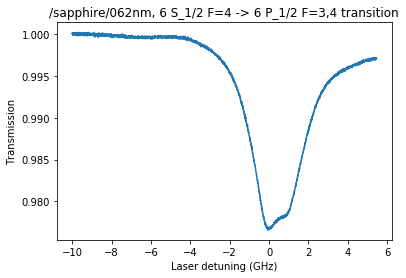

In [17]:
data = f['sapphire/062nm']
plt.plot(data[0], data[1])
plt.xlabel(data.dims[0].label)
plt.ylabel(data.dims[1].label)
plt.title("%s, %s" % (data.name, f["sapphire"].attrs["transition"]))
plt.show()

## Plotting experiment and theoretical prediction together

In [7]:


calc = ThinCellSpectra(nSurface=1.76)
temperature = 236; collisionalBroadening=840; 
collisionalShift = 4678 - 10.; C3 = 1.15; cellLength = 62e-9

laserDetuning = np.linspace(-2000,2000,60)  # (MHz)

calc = ThinCellSpectra(nSurface=1.76)
T = calc.getTransmission(laserDetuning,
                           temperature,
                           collisionalBroadening,
                           collisionalShift,
                           C3,
                           cellLength)


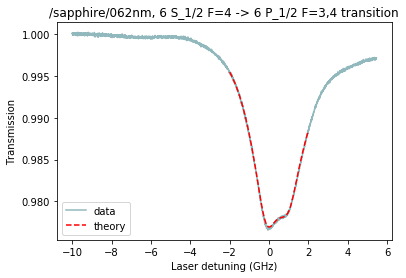

In [8]:
data = f['sapphire/062nm']
plt.plot(data[0], data[1],"b-", label="data", color="#91B8BD")
plt.xlabel(data.dims[0].label)
plt.ylabel(data.dims[1].label)
plt.title("%s, %s" % (data.name, f["sapphire"].attrs["transition"]))

plt.plot(laserDetuning * 1e-3, T, "r--", label="theory")
plt.legend()

plt.show()

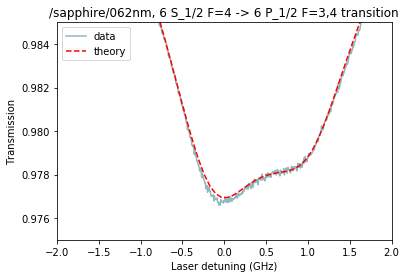

In [10]:
data = f['sapphire/062nm']
plt.plot(data[0], data[1],"b-", label="data", color="#91B8BD")
plt.xlabel(data.dims[0].label)
plt.ylabel(data.dims[1].label)
plt.title("%s, %s" % (data.name, f["sapphire"].attrs["transition"]))

plt.plot(laserDetuning * 1e-3, T, "r--", label="theory")
plt.legend()

plt.ylim(0.975,0.985)
plt.xlim(-2,2)

plt.show()